In [1]:
from typing import Tuple
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import os
from pathlib import Path
from google.colab.patches import cv2_imshow

In [2]:
# Modified from https://stackoverflow.com/questions/50854235/how-to-draw-chinese-text-on-the-image-using-cv2-puttextcorrectly-pythonopen

In [3]:
def init_parameters(fun, **init_dict):
    """
    help you to set the parameters in one's habits
    """
    def job(*args, **option):
        option.update(init_dict)
        return fun(*args, **option)
    return job

In [4]:
def cv2_img_add_text(img, text, left_corner: Tuple[int, int],
                     text_rgb_color= (0, 0, 0), text_size=24, font='mingliu.ttc', **option):
    """
    USAGE:
        cv2_img_add_text(img, '中文', (0, 0), text_rgb_color=(0, 255, 0), text_size=12, font='mingliu.ttc')
    """
    pil_img = img
    if isinstance(pil_img, np.ndarray):
        pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_img)
    font_text = ImageFont.truetype(font=font, size=text_size, encoding=option.get('encoding', 'utf-8'))
    draw.text(left_corner, text, text_rgb_color, font=font_text)
    cv2_img = cv2.cvtColor(np.asarray(pil_img), cv2.COLOR_RGB2BGR)
    if option.get('replace'):
        img[:] = cv2_img[:]
        return None
    return cv2_img

In [5]:
draw_text = init_parameters(cv2_img_add_text, text_size=32, text_rgb_color=(0, 0, 255), font='./KaiTi.ttf', replace=True)

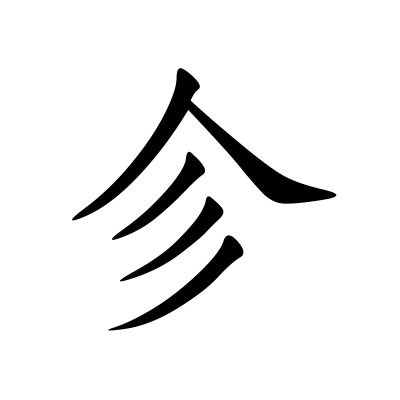

In [6]:
np_img = np.ones((400, 400, 3), dtype=np.uint8) * 255  # background with white color
draw_text = init_parameters(cv2_img_add_text, text_rgb_color=(0, 0, 0), font='./KaiTi.ttf', replace=True)
draw_text(np_img, '㐱', (50, 50), text_size = 300)
cv2_imshow(np_img)

In [28]:
IMG_SIZE = 400
CHAR_SIZE = 300
MARGIN = (IMG_SIZE - CHAR_SIZE) // 2

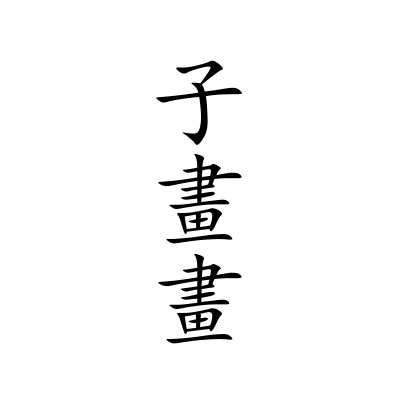

In [30]:
text = "子畫"
img = np.ones((IMG_SIZE, IMG_SIZE, 3), np.uint8)
img[:] = 255
text_size = CHAR_SIZE // len(text)
left_margin = (IMG_SIZE - text_size) // 2
vert_margin = MARGIN
for char in text:
  draw_text(img, char, (left_margin, vert_margin), text_size = text_size)
  vert_margin += text_size
cv2_imshow(img)

In [7]:
# Mount to Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
def extractChar(string):
  if len(string) == 1:
    return string
  # Is either split with '/' or split with char' (char) '
  # To simplify - just going to take the first known
  # Corresponding Chinese character
  string = string.split('/')
  if len(string[0]) == 1:
    return string[0]
  string = string[0].split('（')
  return string[0]

In [32]:
def createCharImgs(file):
    df = pd.read_csv(file)
    for idx in df.index:
        file_name = df['key'][idx] + "_FTZ.png"
        ## Make white canvas
        img = np.ones((IMG_SIZE, IMG_SIZE, 3), np.uint8)
        img[:] = 255
        text = extractChar(df['FTZ'][idx])
        # If multiple characters stack them
        # On top of each other
        if len(text) > 1:
            text_size = CHAR_SIZE // len(text)
            left_margin = (IMG_SIZE - text_size) // 2
            vert_margin = MARGIN
            for char in text:
              draw_text(img, char, (left_margin, vert_margin), text_size = text_size)
              vert_margin += text_size
        else:
            draw_text(img, text, (MARGIN, MARGIN), text_size = CHAR_SIZE)
        #Save image to drive
        im = Image.fromarray(img)
        im.save(file_name)
        !cp -r "$file_name" /content/gdrive/MyDrive/OBS-data/
        !rm "$file_name"
    return df

In [33]:
df = createCharImgs('./hwobc_dict.csv')
df.head(10)

,key,FTZ,JTZ
0,60000,人,人
1,60001,匕（妣）,匕（妣）
2,60002,尸/夷,尸/夷
3,60006,介,介
4,60008,疾,疾
5,60009,㐱,㐱
6,6000B,千,千
7,6000C,企,企
8,6000D,企,企
9,6000E,旨,旨
